# Global_ Surface_Temperature_scatterplot 

In [1]:
import pandas as pd #import the pandas library for read the csv file
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
csv_Data=pd.read_csv('Global_Surface_Temperature.csv')

In [3]:
csv_Data

Year  Global  NHem  SHem  24N-90N  24S-24N  90S-24S  64N-90N  44N-64N  \
0    1880   -0.20 -0.35 -0.06    -0.42    -0.15    -0.06    -1.06    -0.62   
1    1881   -0.11 -0.20 -0.03    -0.30    -0.01    -0.06    -0.66    -0.46   
2    1882   -0.10 -0.18 -0.01    -0.23    -0.09     0.03    -1.36    -0.25   
3    1883   -0.20 -0.31 -0.09    -0.35    -0.21    -0.02    -0.32    -0.62   
4    1884   -0.28 -0.43 -0.13    -0.57    -0.17    -0.12    -1.31    -0.62   
..    ...     ...   ...   ...      ...      ...      ...      ...      ...   
131  2011    0.60  0.71  0.49     0.93     0.38     0.58     2.06     0.91   
132  2012    0.63  0.77  0.50     0.98     0.52     0.45     1.84     0.90   
133  2013    0.66  0.76  0.55     0.88     0.58     0.54     1.17     1.03   
134  2014    0.75  0.91  0.58     1.06     0.67     0.54     1.82     1.13   
135  2015    0.87  1.13  0.62     1.27     0.91     0.41     1.73     1.46   

     24N-44N  EQU-24N  24S-EQU  44S-24S  64S-44S  90S-64S  
0      -0.20    -0.24    -0.06    -0.02    -0.08     0.35  
1      -0.13    -0.04     0.02    -0.06    -0.02     0.33  
2      -0.01    -0.10    -0.09     0.03     0.08     0.37  
3      -0.18    -0.23    -0.20    -0.01     0.00     0.33  
4      -0.40    -0.20    -0.14    -0.15    -0.05     0.36  
..       ...      ...      ...      ...      ...      ...  
131     0.58     0.39     0.37     0.68     0.26     0.92  
132     0.74     0.47     0.57     0.59     0.25     0.34  
133     0.70     0.58     0.57     0.64     0.30     0.67  
134     0.77     0.70     0.64     0.75     0.23     0.49  
135     1.01     0.93     0.90     0.75     0.19    -0.29  

[136 rows x 15 columns]

In [4]:
# maunal method to read the csv file
import csv
with open('Global_Surface_Temperature.csv')as csvFile:
    readCsv=csv.reader(csvFile,delimiter=',');
    for row in readCsv: 
        print(row);
      

['Year', 'Global', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S', '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S', '64S-44S', '90S-64S']
['1880', '-0.2', '-0.35', '-0.06', '-0.42', '-0.15', '-0.06', '-1.06', '-0.62', '-0.2', '-0.24', '-0.06', '-0.02', '-0.08', '0.35']
['1881', '-0.11', '-0.2', '-0.03', '-0.3', '-0.01', '-0.06', '-0.66', '-0.46', '-0.13', '-0.04', '0.02', '-0.06', '-0.02', '0.33']
['1882', '-0.1', '-0.18', '-0.01', '-0.23', '-0.09', '0.03', '-1.36', '-0.25', '-0.01', '-0.1', '-0.09', '0.03', '0.08', '0.37']
['1883', '-0.2', '-0.31', '-0.09', '-0.35', '-0.21', '-0.02', '-0.32', '-0.62', '-0.18', '-0.23', '-0.2', '-0.01', '0', '0.33']
['1884', '-0.28', '-0.43', '-0.13', '-0.57', '-0.17', '-0.12', '-1.31', '-0.62', '-0.4', '-0.2', '-0.14', '-0.15', '-0.05', '0.36']
['1885', '-0.31', '-0.42', '-0.21', '-0.61', '-0.17', '-0.2', '-1.19', '-0.72', '-0.41', '-0.1', '-0.23', '-0.27', '-0.07', '0.34']
['1886', '-0.3', '-0.39', '-0.22', '-0.49', '-0.24', '-0.2',

In [5]:
csv_Data.describe()

Year      Global        NHem        SHem     24N-90N  \
count   136.000000  136.000000  136.000000  136.000000  136.000000   
mean   1947.500000    0.018382    0.036618    0.000809    0.051838   
std      39.403892    0.317472    0.364133    0.291748    0.429810   
min    1880.000000   -0.470000   -0.530000   -0.480000   -0.610000   
25%    1913.750000   -0.210000   -0.225000   -0.222500   -0.272500   
50%    1947.500000   -0.075000   -0.010000   -0.085000    0.000000   
75%    1981.250000    0.182500    0.160000    0.250000    0.200000   
max    2015.000000    0.870000    1.130000    0.620000    1.270000   

          24S-24N     90S-24S     64N-90N     44N-64N     24N-44N     EQU-24N  \
count  136.000000  136.000000  136.000000  136.000000  136.000000  136.000000   
mean     0.026838   -0.026912    0.036029    0.090809    0.018162    0.015735   
std      0.314444    0.288150    0.859150    0.492119    0.325434    0.308225   
min     -0.600000   -0.490000   -1.610000   -0.720000   -0.570000   -0.670000   
25%     -0.210000   -0.260000   -0.580000   -0.275000   -0.182500   -0.230000   
50%     -0.030000   -0.105000   -0.020000    0.010000   -0.060000   -0.020000   
75%      0.235000    0.222500    0.580000    0.360000    0.140000    0.210000   
max      0.910000    0.580000    2.060000    1.460000    1.010000    0.930000   

          24S-EQU     44S-24S     64S-44S     90S-64S  
count  136.000000  136.000000  136.000000  136.000000  
mean     0.038750    0.013750   -0.072647   -0.112794  
std      0.329279    0.303905    0.259102    0.713824  
min     -0.550000   -0.430000   -0.620000   -2.540000  
25%     -0.220000   -0.222500   -0.270000   -0.482500  
50%     -0.030000   -0.080000   -0.090000    0.015000  
75%      0.290000    0.230000    0.160000    0.342500  
max      0.900000    0.750000    0.390000    1.360000

In [6]:
y=csv_Data['Global']
x1=csv_Data['Year']

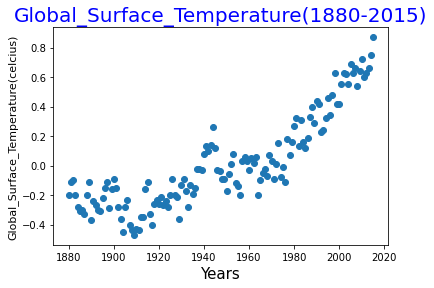

In [7]:
plt.scatter(x1,y)
plt.title('Global_Surface_Temperature(1880-2015)',size=20,color='b')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Global_Surface_Temperature(celcius)',fontsize=11)
plt.show()

In [8]:
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     407.3
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.88e-42
Time:                        11:58:02   Log-Likelihood:                 58.503
No. Observations:                 136   AIC:                            -113.0
Df Residuals:                     134   BIC:                            -107.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5923      0.675    -20.150      0.000     -14.926     -12.258
Year           0.0070      0.000     20.181      0.000       0.006       0.008
==============================================================================
Omnibus:                        6.473   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                3.553
Skew:                           0.173   Prob(JB):                        0.169
Kurtosis:                       2.288   Cond. No.                     9.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

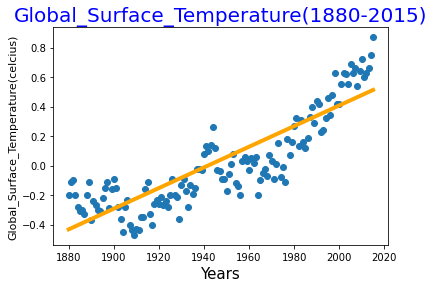

In [10]:
plt.scatter(x1,y)
yhat=-13.5923+0.0070 * x1
fig=plt.plot(x1,yhat,lw=4,c='orange',label='regression line')
plt.title('Global_Surface_Temperature(1880-2015)',size=20,color='b')
plt.xlabel('Years',fontsize=15)
plt.ylabel('Global_Surface_Temperature(celcius)',fontsize=11)
plt.show()